In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import cv2

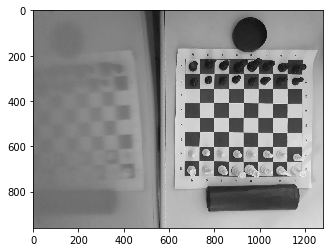

In [2]:
img = cv2.imread("Inicial/inicial0.jpg", 0)

plt.imshow(img, cmap = "gray")

In [3]:
aux = np.zeros((800, 800), dtype = np.float32)
pts_aux = np.float32([[0,0],[aux.shape[1], 0],[aux.shape[1],aux.shape[0]],[0,aux.shape[0]]])

In [4]:
points = []
ix,iy = -1,-1

def get_points(event,x,y,flags,param):
    global ix,iy,drawing,mode, points

    if event == cv2.EVENT_LBUTTONDOWN:
        ix,iy = x,y
        #print(x, y)
        points.append([x, y])

img_r = cv2.resize(img, (int(img.shape[1]/1.4), int(img.shape[0]/1.4)))

#descomentar abaixo para clicar na tela

#cv2.imshow("click", img_r)
#cv2.setMouseCallback('click', get_points)

# while (1):
#     k = cv2.waitKey(1) & 0xFF
#     if k == ord('q') or k == 27:
#         break
        
# cv2.destroyAllWindows()


pts1 = np.float32(points[:4])

In [5]:
pts1

array([], dtype=float32)

In [6]:
pts1 = np.array([[481., 156.],
       [852., 158.],
       [852., 522.],
       [478., 523.]], dtype = np.float32)

In [7]:
M = cv2.getPerspectiveTransform(pts1, pts_aux)

In [8]:
perspectiva = cv2.warpPerspective(img_r, M,(aux.shape[1], aux.shape[0]), aux, borderMode = cv2.BORDER_TRANSPARENT)

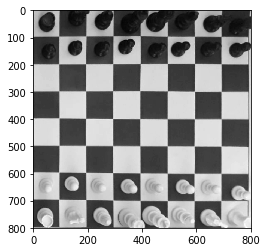

In [9]:
plt.imshow(perspectiva, cmap = "gray")

In [10]:
pts1

array([[481., 156.],
       [852., 158.],
       [852., 522.],
       [478., 523.]], dtype=float32)

In [11]:
lst = []
for i in range(8):
    for j in range(8):
        lst.append(perspectiva[perspectiva.shape[1]*i//8:perspectiva.shape[1]*(i+1)//8, perspectiva.shape[0]*j//8:perspectiva.shape[0]*(j+1)//8])

In [12]:
np.array(lst).shape

(64, 100, 100)

In [13]:
array = np.array(lst).reshape(8, 8, 100, -1)

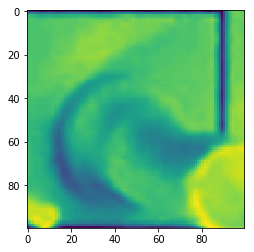

In [14]:
plt.imshow(array[7, 7])

In [15]:
import os
files = []
# r=root, d=directories, f = files
for r, d, f in os.walk("Inicial/"):
    for file in f:
        if '.jpg' in file:
            files.append(os.path.join(r, file))

In [16]:
perspectiva = []
lst_geral = []

for path in sorted(files):
    img = cv2.imread(path, 0)
    M = cv2.getPerspectiveTransform(pts1, pts_aux)
    img_r = cv2.resize(img, (int(img.shape[1]/1.4), int(img.shape[0]/1.4)))
    perspectiva.append(cv2.warpPerspective(img_r, M,(aux.shape[1], aux.shape[0]), aux, borderMode = cv2.BORDER_TRANSPARENT))
    lst = []
    for i in range(8):
        for j in range(8):
            lst.append(perspectiva[-1][perspectiva[-1].shape[1]*i//8:perspectiva[-1].shape[1]*(i+1)//8, perspectiva[-1].shape[0]*j//8:perspectiva[-1].shape[0]*(j+1)//8])
    array = np.array(lst).reshape(8, 8, 100, -1)
    lst_geral.append(array)

In [17]:
array_imgs = np.array(perspectiva)
array_geral = np.array(lst_geral)

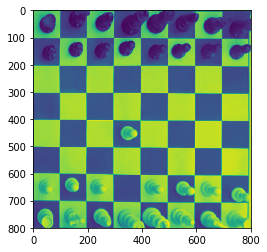

In [18]:
plt.imshow(perspectiva[1])

In [19]:
array_geral.shape

(6, 8, 8, 100, 100)

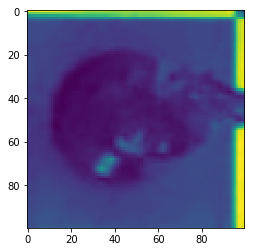

In [20]:
plt.imshow(array_geral[5][2, 5])

In [31]:
hist_cav0 = cv2.calcHist([array_geral[4][2, 5]],[0],None,[256],[0,256]).ravel()
#plt.plot(hist_cav0)

In [32]:
hist_vazio0 = cv2.calcHist([array_geral[0][2, 5]],[0],None,[256],[0,256]).ravel()
#plt.plot(hist_vazio0)

In [33]:
hist_vazio1 = cv2.calcHist([array_geral[1][2, 5]],[0],None,[256],[0,256]).ravel()
#plt.plot(hist_vazio1)

In [34]:
hist_cav1 = cv2.calcHist([array_geral[5][2, 5]],[0],None,[256],[0,256]).ravel()
#plt.plot(hist_cav1)

In [35]:
hist_cav0 = hist_cav0/np.linalg.norm(hist_cav0)
hist_cav1 = hist_cav1/np.linalg.norm(hist_cav1)
hist_vazio0 = hist_vazio0/np.linalg.norm(hist_vazio0)
hist_vazio1 = hist_vazio1/np.linalg.norm(hist_vazio1)

In [41]:
def dist_imgs(a, b):
    hista = cv2.calcHist([a],[0],None,[256],[0,256]).ravel()
    histb = cv2.calcHist([b],[0],None,[256],[0,256]).ravel()
    
    hista_n = hista/np.linalg.norm(hista)
    histb_n = histb/np.linalg.norm(histb)
    return np.max(np.correlate(hista_n, histb_n, "full"))

In [42]:
dist_imgs(array_geral[4][2, 5], array_geral[5][2, 5])

0.967913

In [44]:
dist_imgs(array_geral[0][2, 5], array_geral[1][2, 5])

0.9902705

In [45]:
dist_imgs(array_geral[3][2, 5], array_geral[4][2, 5])

0.5710191

In [97]:
imgs = (1, 2)

lst = []
for i in range(8):
    for j in range(8):
        lst.append(dist_imgs(array_geral[imgs[0]][i, j], array_geral[imgs[1]][i, j]))

In [98]:
lst = np.array(lst).reshape(8, 8)

In [102]:
idx = np.argmin(lst, axis = None) 
ind = np.unravel_index(idx, lst.shape)

In [103]:
ind

(1, 5)

In [89]:
lst[3, 5]

0.7480055

In [101]:
lst[3, 5] = 1

In [92]:
lst[3, 3]

1.0